In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output

sns.set(rc={'figure.figsize':(16,9)})

In [2]:
foldername = 'data/zadanie-3-sztuczny-analizator-temperatury-żużla-wewnątrz-pieca-zawiesionowego/'
#foldername = 'Dane testowe2/'
output = [dI for dI in os.listdir(foldername) if dI not in ['temp_zuz.csv', 'opis_zmiennych.xlsx']]
df = pd.DataFrame()
for x in output:
    df_pom = pd.read_csv((foldername+x), delimiter=',')
    #print(df_pom.shape)
    df = pd.concat([df, df_pom])
print(df.shape)
df.head()
temp_zuz = pd.read_csv((foldername+'temp_zuz.csv'), delimiter=';')
df['czas']  = pd.to_datetime(df['czas'])
opis = pd.read_excel((foldername+'opis_zmiennych.xlsx'), engine='openpyxl')
opis['opis'] = opis['opis'] + ' ['+ opis['Jednostka'] + ']'

df = df.iloc[:, 5:]

(702780, 63)


In [57]:
opis_zip = zip(opis.Tagname.str.lower(), opis.opis.values)
opis_dict = dict(opis_zip)
opis_dict['037tix00254.daca.pv'] = 'TEMP. WODY ZASIL.OBIEG PZ 1[°C]'
opis_dict['037tix00264.daca.pv'] = 'TEMP. WODY ZASIL.OBIEG PZ 2[°C]'
df.rename(columns=opis_dict, inplace=True)

In [40]:
df['czas'] = pd.to_datetime(df['czas']).dt.tz_convert('CET')

temp_zuz['time_cet']  = pd.to_datetime(temp_zuz['Czas']).dt.tz_localize('CET', ambiguous = 'NaT')
temp_zuz = temp_zuz[temp_zuz['time_cet'].dt.minute == 0]

AmbiguousTimeError: Cannot infer dst time from 2020-10-25 02:00:00, try using the 'ambiguous' argument

In [158]:

df_tidy = pd.DataFrame()

df_tidy['time_cet'] = pd.to_datetime(df['czas']).dt.tz_convert('CET')

    


df_tidy['woda_powrotna_przeplyw'] = (
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ7 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ8 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ9 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ10 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ11 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ12 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ13 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ15 [m3/h]']
)


df_tidy['woda_powrotna_temp'] = (
    df['WODA POWROTNA KOLEKTORA KZ7 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ7 [m3/h]'] + 
    df['WODA POWROTNA KOLEKTORA KZ8 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ8 [m3/h]'] + 
    df['WODA POWROTNA KOLEKTORA KZ9 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ9 [m3/h]'] +   
    df['WODA POWROTNA KOLEKTORA KZ10 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ10 [m3/h]'] +   
    df['WODA POWROTNA KOLEKTORA KZ11 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ11 [m3/h]'] +   
    df['WODA POWROTNA KOLEKTORA KZ12 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ12 [m3/h]'] +   
    df['WODA POWROTNA KOLEKTORA KZ13 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ13 [m3/h]'] +   
    df['WODA POWROTNA KOLEKTORA KZ15 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ15 [m3/h]'] 
) / df_tidy['woda_powrotna_przeplyw']



df_tidy['woda_zasil_temp'] = (df['TEMP. WODY ZASIL.OBIEG PZ 1[°C]'] + df['TEMP. WODY ZASIL.OBIEG PZ 2[°C]'])/2

df_tidy['koncentrat'] = df['REG NADAWY KONCENTRATU LIW1 [Mg/h]'] + df['REG NADAWY KONCENTRATU LIW2 [Mg/h]']

df_tidy['pyl'] = df['REG PYL ZWROT LIW4 [Mg/h]']

df_tidy['prazonka'] = df['REG KONCENTRAT PRAZONY LIW3 [Mg/h]']

df_tidy['wymurowka_temp'] = (df['TEMP.17 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.18 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.19 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.20 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.21 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP22 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.23 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.24 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.9 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.10 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.11 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.12 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.13 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.14 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.15 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.16 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.1 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.2 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.3 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.4 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.5 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.6 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.7 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.8 POD 2 WARSTWĄ WYMURÓWKI [°C]']) / 24

df_tidy['prob_corg'] = df['prob_corg [%]'] 
df_tidy['prob_s'] = df['prob_s [%]'] 
df_tidy['prob_fe'] = df['prob_fe [%]'] 




df_tidy['prazonka_fe'] = df['Prażona mieszanina koncentratów HG1 - fe [%]']
df_tidy['prazonka_s'] = df['Prażona mieszanina koncentratów HG1 - sog [%]']

df_tidy['wentylator'] = (df['WENT.  RF01\xa0 ODCZ_ZAD OBROTÓW [%]'] + df['WENT.  RF02 ODCZ_ZAD OBROTÓW [%]'] + df['WENT.  RF03\xa0 ODCZ_ZAD OBROTÓW [%]'])/3

df_tidy['moc_cieplna_odebrana'] = df['SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA [MW]']

df_tidy['kol_kan_temp'] = (df['TEMP.\xa0 NA KOL.. KAN.1-34 [°C]'] + df['TEMP.\xa0 NA KOL.. KAN.35-68 [°C]'])/2


df_tidy['hour'] = (df_tidy['time_cet'].dt.hour).mod(8).astype(object)

In [104]:
df_tidy.get_dummies()

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

,temp_zuz,woda_powrotna_przeplyw,woda_powrotna_temp,temp_wody_zasil,koncentrat,pyl,prazonka,temp_wymorowka,prob_corg,prob_s,prob_fe,prazonka_fe,prazonka_s,wentylator1,wentylator2,wentylator3,moc_cieplna_odebrana,temp_na_kol_1_34,temp_na_kol_35_68,hour
temp_zuz,1.000000,0.242495,0.124096,0.071009,0.154552,0.120435,-0.003651,0.158251,0.163766,-0.079929,-0.083995,-0.146310,0.116593,0.208567,0.212815,0.205925,0.210006,0.121032,0.125141,-0.033671
woda_powrotna_przeplyw,0.242495,1.000000,0.404598,0.268292,-0.046570,-0.073036,-0.141489,0.200615,0.453553,-0.306662,-0.268074,-0.388188,0.394220,0.034143,0.017856,0.021445,0.496870,0.466012,0.471298,-0.008338
woda_powrotna_temp,0.124096,0.404598,1.000000,0.931729,0.029593,-0.108819,-0.021581,-0.027424,0.325666,-0.399898,-0.430787,-0.318087,0.184607,-0.227211,-0.240657,-0.233492,0.225395,0.233981,0.234735,0.024810
temp_wody_zasil,0.071009,0.268292,0.931729,1.000000,0.032134,-0.035444,-0.005464,-0.012706,0.172580,-0.216266,-0.238527,-0.187120,0.110268,-0.080726,-0.086844,-0.083507,0.211575,0.160884,0.161484,0.014366
koncentrat,0.154552,-0.046570,0.029593,0.032134,1.000000,0.663862,0.532902,-0.227507,-0.069107,-0.125023,-0.141185,0.176360,-0.244982,-0.069506,-0.074267,-0.061807,0.139056,-0.257341,-0.257289,0.043877
pyl,0.120435,-0.073036,-0.108819,-0.035444,0.663862,1.000000,0.252183,-0.081410,-0.106870,0.157594,0.172853,0.155266,-0.102135,0.093041,0.110731,0.107588,0.120771,-0.083879,-0.083442,0.048908
prazonka,-0.003651,-0.141489,-0.021581,-0.005464,0.532902,0.252183,1.000000,-0.428327,-0.056802,-0.196083,-0.262579,0.585295,-0.629131,-0.022813,-0.044509,-0.034407,-0.375066,-0.494531,-0.489750,0.009600
temp_wymorowka,0.158251,0.200615,-0.027424,-0.012706,-0.227507,-0.081410,-0.428327,1.000000,0.031393,0.170373,0.263445,-0.311470,0.500549,0.559645,0.588062,0.563881,0.319934,0.759712,0.758881,0.002916
prob_corg,0.163766,0.453553,0.325666,0.172580,-0.069107,-0.106870,-0.056802,0.031393,1.000000,-0.461500,-0.517014,-0.340191,0.217234,-0.124944,-0.144503,-0.140638,0.327693,0.192863,0.194011,-0.001180
prob_s,-0.079929,-0.306662,-0.399898,-0.216266,-0.125023,0.157594,-0.196083,0.170373,-0.461500,1.000000,0.865006,0.285793,0.047154,0.222444,0.244770,0.237968,0.009121,0.102323,0.101483,0.004059


In [142]:
dict_check = dict()

for time_end in [0, 10, 20, 30, 40, 50, 60, 70, 80]:
    for time_length in [1, 5, 10, 15, 20, 30, 45, 59]:
        df_tidy['time_temp'] = df_tidy['time_cet']+pd.Timedelta(time_end + time_length,'m')
        df_tidy_temp = pd.DataFrame(df_tidy[df_tidy['time_temp'].dt.minute <=time_length])
        df_tidy_temp['time_bin'] = df_tidy_temp['time_temp'].dt.floor('H', ambiguous = 'NaT')
        
        df_tidy_temp = pd.merge(
            temp_zuz[['temp_zuz', 'time_cet']],
            df_tidy_temp, 
            left_on = 'time_cet', 
            right_on='time_bin',
            how = 'inner')
        df_tidy_temp = df_tidy_temp.groupby('time_bin').agg({
            'temp_zuz' : 'max', #w jednym oknie tylko jedna wartość, równie dobrze mogłaby być dowolna agregacja
            'woda_powrotna_przeplyw': 'mean',
            'woda_powrotna_temp': 'mean',
            'temp_wody_zasil': 'mean',
            'koncentrat': 'mean',
            'pyl': 'mean',
            'prazonka': 'mean',
            'temp_wymorowka': 'mean',
            'prob_corg': 'mean',
            'prob_s': 'mean',
            'prob_fe': 'mean',
            'prazonka_fe': 'mean',
            'prazonka_s': 'mean',
            'wentylator1': 'mean',
            'wentylator2': 'mean',
            'wentylator3': 'mean',
            'moc_cieplna_odebrana': 'mean',
            'temp_na_kol_1_34': 'mean',
            'temp_na_kol_35_68': 'mean'
        })
        dict_check[
            'end:' + str(time_end) + 
            ' len:' + str(time_length)] = df_tidy_temp.corr().temp_zuz
        print('end:' + str(time_end) + ' len:' + str(time_length) +' done!!1')
        clear_output(wait=True)
        
print('Done!')
        

Done!


In [152]:
pd.DataFrame(dict_check).transpose().agg(['max', 'min']).transpose()

,max,min
temp_zuz,1.000000,1.000000
woda_powrotna_przeplyw,0.251279,0.245391
woda_powrotna_temp,0.135379,0.108177
temp_wody_zasil,0.069164,0.058530
koncentrat,0.233558,0.153930
pyl,0.120993,0.086396
prazonka,-0.014117,-0.032580
temp_wymorowka,0.142900,0.142026
prob_corg,0.167056,0.153225
prob_s,-0.075923,-0.077298


In [157]:
print(pd.DataFrame(dict_check).idxmax(axis=1))
pd.DataFrame(dict_check).idxmin(axis=1)

temp_zuz                    end:0 len:1
woda_powrotna_przeplyw      end:0 len:1
woda_powrotna_temp          end:0 len:1
temp_wody_zasil             end:0 len:1
koncentrat                 end:40 len:5
pyl                       end:80 len:59
prazonka                   end:40 len:5
temp_wymorowka              end:0 len:1
prob_corg                   end:0 len:1
prob_s                    end:60 len:59
prob_fe                    end:0 len:45
prazonka_fe               end:80 len:59
prazonka_s                 end:0 len:10
wentylator1                 end:0 len:1
wentylator2                 end:0 len:5
wentylator3                 end:0 len:1
moc_cieplna_odebrana       end:0 len:59
temp_na_kol_1_34          end:80 len:59
temp_na_kol_35_68         end:80 len:59
dtype: object


temp_zuz                    end:0 len:1
woda_powrotna_przeplyw    end:80 len:59
woda_powrotna_temp        end:80 len:59
temp_wody_zasil           end:80 len:59
koncentrat                  end:0 len:1
pyl                        end:70 len:1
prazonka                   end:80 len:1
temp_wymorowka            end:80 len:59
prob_corg                 end:80 len:30
prob_s                      end:0 len:1
prob_fe                   end:80 len:10
prazonka_fe               end:40 len:30
prazonka_s                end:80 len:30
wentylator1               end:80 len:59
wentylator2               end:80 len:59
wentylator3               end:80 len:59
moc_cieplna_odebrana       end:80 len:1
temp_na_kol_1_34            end:0 len:1
temp_na_kol_35_68           end:0 len:1
dtype: object

In [120]:
df_tidy_temp['time_temp'].dt.minute

0       1
59      0
60      1
119     0
120     1
       ..
1319    0
1320    1
1379    0
1380    1
1439    0
Name: time_temp, Length: 23426, dtype: int64

In [ ]:
sns.set(rc={'figure.figsize':(16,16)})
sns.pairplot(df_tidy)

In [66]:
df['TEMP.17 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.18 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.19 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.20 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.21 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP22 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.23 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.24 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.9 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.10 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.11 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.12 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.13 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.14 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.15 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.16 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.1 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.2 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.3 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.4 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.5 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.6 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.7 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.8 POD 2 WARSTWĄ WYMURÓWKI [°C]']


0       10055.783164
1       10055.761413
2       10055.739666
3       10055.717928
4       10055.696179
            ...     
1435    10027.211968
1436    10027.185943
1437    10027.159924
1438    10027.133902
1439    10027.107878
Length: 702780, dtype: float64

In [68]:
import statsmodels.api as sm
 
 
# performing the regression
# and fitting the model
result = sm.OLS(list(temp_zuz.temp_zuz), x).fit()
 
# printing the summary table
print(result.summary())

,Czas,temp_zuz,time_cet
0,2020-10-01 00:00:00,1297,2020-10-01 00:00:00+02:00
1,2020-10-01 01:00:00,1295,2020-10-01 01:00:00+02:00
2,2020-10-01 02:00:00,1303,2020-10-01 02:00:00+02:00
3,2020-10-01 02:30:00,1302,2020-10-01 02:30:00+02:00
4,2020-10-01 03:00:00,1303,2020-10-01 03:00:00+02:00
...,...,...,...
11379,2022-01-31 20:00:00,1305,2022-01-31 20:00:00+01:00
11380,2022-01-31 21:00:00,1304,2022-01-31 21:00:00+01:00
11381,2022-01-31 22:00:00,1308,2022-01-31 22:00:00+01:00
11382,2022-01-31 23:00:00,1309,2022-01-31 23:00:00+01:00


0        0
1        0
2        0
3        0
4        0
        ..
1435    23
1436    23
1437    23
1438    23
1439    23
Name: time_cet, Length: 702780, dtype: int64

In [88]:
temp_zuz.temp_zuz

0        1297
1        1295
2        1303
3        1302
4        1303
         ... 
11379    1305
11380    1304
11381    1308
11382    1309
11383    1305
Name: temp_zuz, Length: 11384, dtype: int64

In [45]:
help(pd.to_datetime(temp_zuz['Czas']).dt.tz_localize)

Help on method tz_localize in module pandas.core.accessor:

tz_localize(*args, **kwargs) method of pandas.core.indexes.accessors.DatetimeProperties instance
    Localize tz-naive Datetime Array/Index to tz-aware
    Datetime Array/Index.
    
    This method takes a time zone (tz) naive Datetime Array/Index object
    and makes this time zone aware. It does not move the time to another
    time zone.
    
    This method can also be used to do the inverse -- to create a time
    zone unaware object from an aware object. To that end, pass `tz=None`.
    
    Parameters
    ----------
    tz : str, pytz.timezone, dateutil.tz.tzfile or None
        Time zone to convert timestamps to. Passing ``None`` will
        remove the time zone information preserving local time.
    ambiguous : 'infer', 'NaT', bool array, default 'raise'
        When clocks moved backward due to DST, ambiguous times may arise.
        For example in Central European Time (UTC+01), when going from
        03:00 DST t

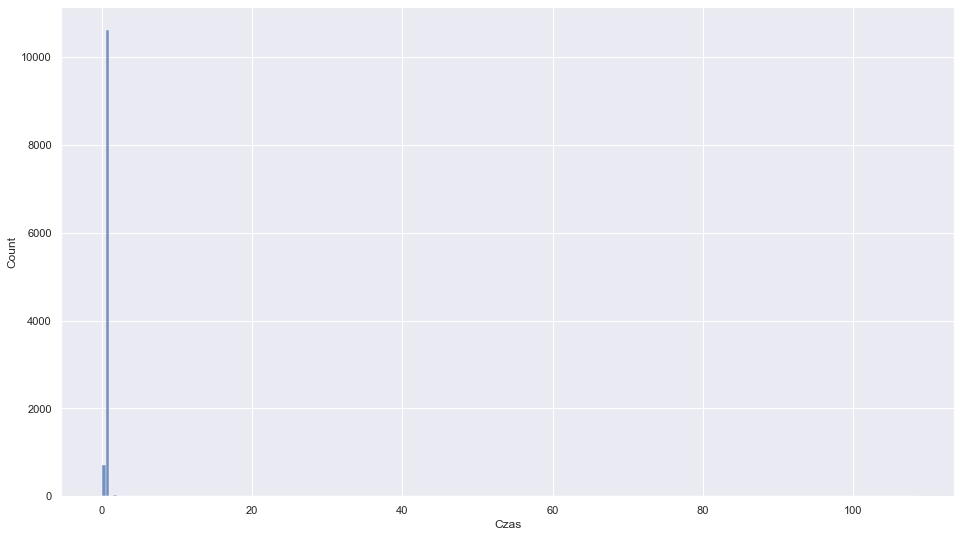

In [25]:

sns.histplot(pd.to_datetime(temp_zuz['Czas'], utc=True).diff().dt.total_seconds()/3600, binwidth=.5)